Downloading and installing necessary packages

In [1]:
!pip install osm-flex
!pip install osmosis
!pip install rasterstats
!pip install rioxarray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.7/71.7 kB 6.9 MB/s eta 0:00:00
Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl (363.4 MB)
Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl (13.8 MB)
Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl (24.6 MB)
Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl (883 kB)
Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl (664.8 MB)
Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl (211.5

In [2]:
# Loading necessary data packages
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import rioxarray as rxr
from rasterstats import zonal_stats
from shapely.geometry import Point
from shapely.geometry import LineString

# import sys
# sys.path.append('') #'your-path-to/osm-flex/src'

import osm_flex
import osm_flex.download as dl
import osm_flex.extract as ex
import osm_flex.config
import osm_flex.clip as cp

osm_flex.enable_logs()

1. Using the OSM Flex package to download the Road Network for the Study Area

In [3]:
# Download the Spain country file from download.geofabrik.de
# downloads requested file only if necessary, and returns save path
iso3 = 'ESP'
path_esp_dump = dl.get_country_geofabrik(iso3)
print(f'Saved as {path_esp_dump}')

INFO:osm_flex.download:Download file: /root/osm/osm_bpf/spain-latest.osm.pbf


Saved as /root/osm/osm_bpf/spain-latest.osm.pbf


In [4]:
# available wrapper categories:
osm_flex.config.DICT_CIS_OSM.keys()

dict_keys(['education', 'healthcare', 'water', 'telecom', 'road', 'main_road', 'rail', 'air', 'gas', 'oil', 'power', 'wastewater', 'food', 'buildings'])

In [5]:
# Convert the osm_flex CI dictionary into a Pandas DataFrame for easier exploration of the available CI keys (categories).
DICT_CIS_OSM = pd.DataFrame(osm_flex.config.DICT_CIS_OSM)

# Display the first few rows of the DataFrame to preview its structure and the CI keys it contains.
DICT_CIS_OSM.head()

,education,healthcare,water,telecom,road,main_road,rail,air,gas,oil,power,wastewater,food,buildings
osm_keys,"[amenity, building, name]","[amenity, building, healthcare, name]","[man_made, pump, pipeline, emergency, name]","[man_made, tower_type, telecom, communication_...","[highway, name, maxspeed, lanes, surface]","[highway, name, maxspeed, lanes, surface]","[railway, name, gauge, electrified, voltage]","[aeroway, name]","[man_made, pipeline, utility, name]","[pipeline, man_made, amenity, name]","[power, voltage, utility, name]","[reservoir_type, man_made, utility, natural, n...","[shop, name]","[building, amenity, name]"
osm_query,building='school' or amenity='school' or\n ...,amenity='hospital' or healthcare='hospital' or...,man_made='water_well' or man_made='water_works...,tower_type='communication' or man_made='mast' ...,"highway in ('motorway', 'motorway_link', 'trun...","highway in ('primary', 'primary_link', 'second...",railway='rail' or railway='tram' or\n ...,aeroway='aerodrome',(man_made='pipeline' and substance='gas') or\n...,(pipeline='substation' and substance='oil') or...,power='line' or power='cable' or\n ...,reservoir_type='sewage' or\n ...,shop='supermarket' or shop='greengrocer' or\n ...,building='yes' or building='house' or \n ...


In [6]:
# Optionally, check the signature of the extraction function
? ex.extract_cis

In [7]:
gdf_esp_mainroad = ex.extract_cis(path_esp_dump, 'main_road')

# Drop rows where geometry type is not LineString
gdf_esp_mainroad = gdf_esp_mainroad[gdf_esp_mainroad.geometry.geom_type == 'LineString']

INFO:osm_flex.extract:query is finished, lets start the loop
extract points: 0it [00:32, ?it/s]
INFO:osm_flex.extract:query is finished, lets start the loop
extract multipolygons: 100%|██████████| 2/2 [02:35<00:00, 77.92s/it] 
INFO:osm_flex.extract:query is finished, lets start the loop
extract lines: 100%|██████████| 650457/650457 [02:16<00:00, 4781.00it/s] 


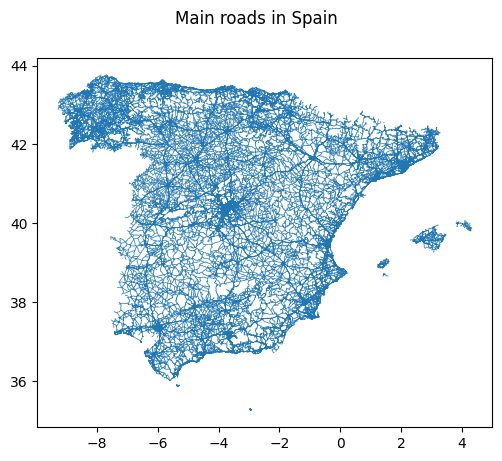

In [8]:
fig, ax = plt.subplots()
gdf_esp_mainroad.plot(ax=ax, linewidth=0.5)
fig.suptitle('Main roads in Spain')
plt.show()

In [9]:
gdf_esp_mainroad.to_csv('Spain_main_roads.csv')
Spain_Roadnetwork = pd.DataFrame(gdf_esp_mainroad)

In [10]:
Spain_Roadnetwork.head()

,osm_id,highway,name,maxspeed,lanes,surface,geometry
0,407780,secondary,Oviedo-Porceyo,None,1,None,"LINESTRING (-5.78146 43.44459, -5.78127 43.444..."
1,3318645,primary,None,40,1,asphalt,"LINESTRING (1.36978 38.87886, 1.36979 38.87888..."
2,3318733,tertiary,Carretera de Cova Santa - Caleta,None,2,asphalt,"LINESTRING (1.33186 38.89727, 1.33184 38.89711..."
3,3318734,tertiary,Carretera Aeroport - Sa Caleta,40,2,asphalt,"LINESTRING (1.35172 38.87414, 1.3518 38.87416,..."
4,3318735,secondary,None,40,2,asphalt,"LINESTRING (1.35878 38.89361, 1.35901 38.89332..."


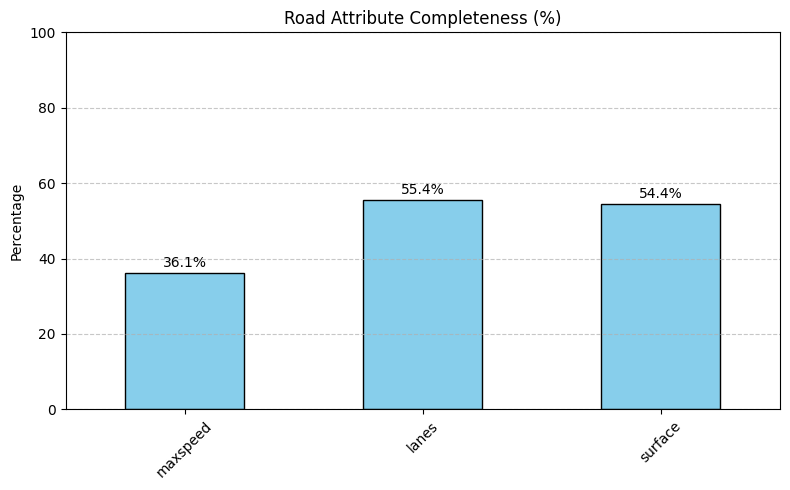

In [11]:
# Assign DataFrame for easier handling
df_Spain = Spain_Roadnetwork

# Columns of interest
columns = ['maxspeed', 'lanes', 'surface']

# Calculate completeness (non-null percentage)
completeness = df_Spain[columns].notnull().mean() * 100

# Plot
plt.figure(figsize=(8, 5))
completeness.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Road Attribute Completeness (%)')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values
for idx, val in enumerate (completeness):
    plt.text(idx, val + 1, f'{val:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Specific Regions

In [12]:
# Obtain the region polygons
admin_1_esp = cp.get_admin1_shapes('ESP')
admin_1_esp.keys()

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_1_states_provinces.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


dict_keys(['Ceuta', 'Melilla', 'Navarre', 'Gipuzkoa', 'Huesca', 'Lleida', 'Girona', 'Badajoz', 'Cádiz', 'Ourense', 'Cáceres', 'Salamanca', 'Zamora', 'Pontevedra', 'Huelva', 'Barcelona', 'Tarragona', 'Castellón', 'Valencia', 'Alicante', 'Murcia', 'Almería', 'Granada', 'Málaga', 'Seville', 'A Coruña', 'Lugo', 'Asturias', 'Cantabria', 'Biscay', 'Santa Cruz de Tenerife', 'Las Palmas', 'Balearic Islands', 'Zaragoza', 'La Rioja', 'Araba / Álava', 'Albacete', 'Teruel', 'Cuenca', 'Toledo', 'León', 'Soria', 'Burgos', 'Ávila', 'Palencia', 'Ciudad Real', 'Córdoba', 'Guadalajara', 'Jaén', 'Community of Madrid', 'Segovia', 'Valladolid'])

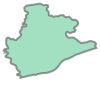

In [13]:
Malaga_shp = admin_1_esp['Málaga']
Malaga_shp

Barcelona_shp = admin_1_esp['Barcelona']
Barcelona_shp

In [14]:
!rm /root/osm/poly/temp_shp.poly

rm: cannot remove '/root/osm/poly/temp_shp.poly': No such file or directory


In [15]:
# Clip the region polygon:
cp.clip_from_shapes([Malaga_shp],
                    osmpbf_output=osm_flex.config.OSM_DATA_DIR.joinpath('Malaga.osm.pbf'),
                    osmpbf_clip_from=path_esp_dump,
                    kernel='osmosis', overwrite=True)

# Clip the region polygon:
cp.clip_from_shapes([Barcelona_shp],
                    osmpbf_output=osm_flex.config.OSM_DATA_DIR.joinpath('Barcelona.osm.pbf'),
                    osmpbf_clip_from=path_esp_dump,
                    kernel='osmosis', overwrite=True)

INFO:osm_flex.clip:File doesn`t yet exist or overwriting old one.
                    Assembling osmosis command.
INFO:osm_flex.clip:Extracting from larger file...
                    This will take a while
INFO:osm_flex.clip:File doesn`t yet exist or overwriting old one.
                    Assembling osmosis command.
INFO:osm_flex.clip:Extracting from larger file...
                    This will take a while


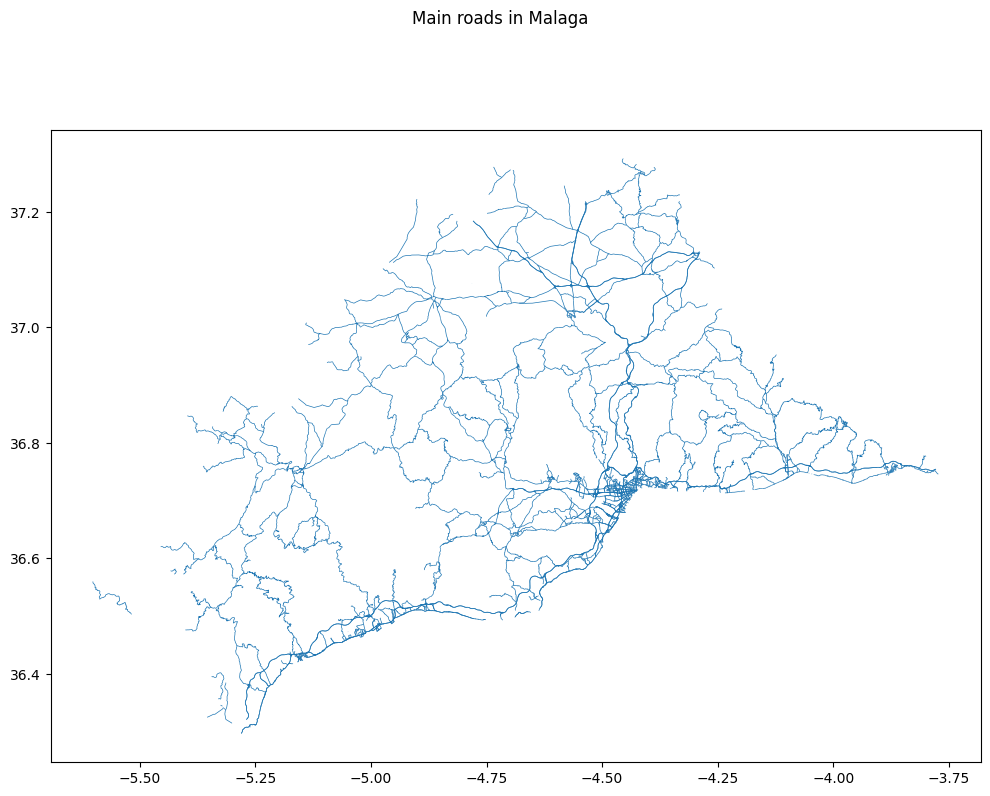

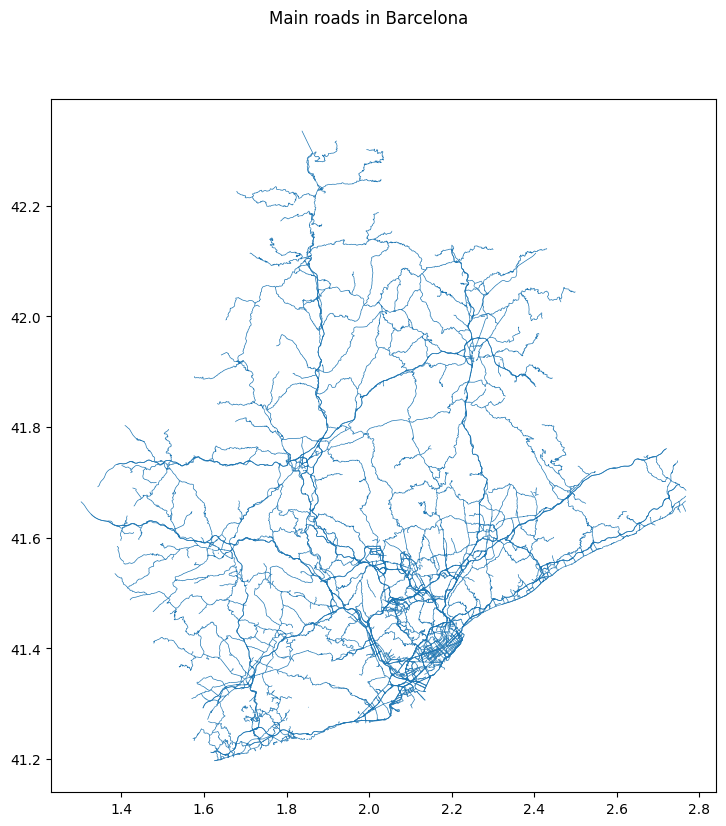

In [16]:
Malaga_Roadnetwork = gdf_esp_mainroad[gdf_esp_mainroad.intersects(Malaga_shp)]
fig, ax = plt.subplots(figsize=(12, 9))
Malaga_Roadnetwork.plot(ax=ax, linewidth=0.5)
fig.suptitle('Main roads in Malaga')
plt.show()

Barcelona_Roadnetwork = gdf_esp_mainroad[gdf_esp_mainroad.intersects(Barcelona_shp)]
fig, ax = plt.subplots(figsize=(12, 9))
Barcelona_Roadnetwork.plot(ax=ax, linewidth=0.5)
fig.suptitle('Main roads in Barcelona')
plt.show()

2. Malaga

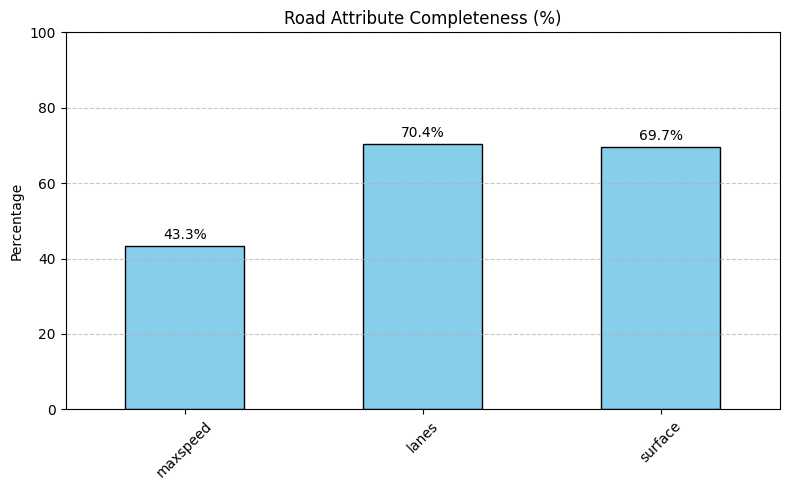

In [17]:
# Assign DataFrame for easier handling
df_Malaga = Malaga_Roadnetwork

# Columns of interest
columns = ['maxspeed', 'lanes', 'surface']

# Calculate completeness (non-null percentage)
completeness = df_Malaga[columns].notnull().mean() * 100

# Plot
plt.figure(figsize=(8, 5))
completeness.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Road Attribute Completeness (%)')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values
for idx, val in enumerate (completeness):
    plt.text(idx, val + 1, f'{val:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [18]:
df_Malaga['Centroid'] = df_Malaga.geometry.centroid
df_Malaga['Midpoint'] = df_Malaga.geometry.apply(lambda geom: geom.interpolate(0.5, normalized=True))
df_Malaga.to_csv('Malaga_main_roads.csv')

<ipython-input-18-811b277bed67>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_Malaga['Centroid'] = df_Malaga.geometry.centroid
/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [21]:
def calculate_sinuosity(geometry):
    # Calculate the actual road distance (length of the LineString)
    road_distance = geometry.length

    # Calculate the Euclidean distance (straight line distance between the first and last points)
    start_point = Point(geometry.coords[0])
    end_point = Point(geometry.coords[-1])
    euclidean_distance = start_point.distance(end_point)

    # Avoid division by zero by adding a small value to the denominator
    sinuosity = road_distance / (euclidean_distance + 1e-100)  # Added 1e-100 to avoid ZeroDivisionError

    return sinuosity

# Apply the function to each geometry in the GeoDataFrame
df_Malaga['sinuosity'] = df_Malaga['geometry'].apply(calculate_sinuosity)

df_Malaga

/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,osm_id,highway,name,maxspeed,lanes,surface,geometry,Centroid,Midpoint,sinuosity
32,4049733,motorway,Autovía de Estación de Salinas a Villanueva de...,120,2,asphalt,"LINESTRING (-4.29162 37.12792, -4.29164 37.127...",POINT (-4.29166 37.12704),POINT (-4.29166 37.12704),1.001917
37,4049778,motorway,Autopista del Mediterráneo,100,2,asphalt,"LINESTRING (-4.72473 36.50683, -4.72579 36.506...",POINT (-4.72775 36.50608),POINT (-4.72777 36.50614),1.004106
38,4049784,primary,None,50,3,asphalt,"LINESTRING (-4.47432 36.68569, -4.47421 36.685...",POINT (-4.47422 36.68561),POINT (-4.47422 36.68561),1.002508
41,4053813,secondary,Avenida de Málaga,None,None,asphalt,"LINESTRING (-5.14996 36.75322, -5.15 36.75312,...",POINT (-5.15054 36.75239),POINT (-5.15054 36.75239),1.004336
42,4053815,secondary,None,None,2,asphalt,"LINESTRING (-5.055 36.86399, -5.05502 36.86399...",POINT (-5.0593 36.85678),POINT (-5.06218 36.8567),1.472875
...,...,...,...,...,...,...,...,...,...,...
649152,1374826925,tertiary,None,None,None,asphalt,"LINESTRING (-5.14703 36.43452, -5.14705 36.434...",POINT (-5.14707 36.43441),POINT (-5.14711 36.4344),1.621098
649163,1374862743,tertiary,None,None,None,asphalt,"LINESTRING (-4.32045 36.8011, -4.32033 36.8012...",POINT (-4.29988 36.7996),POINT (-4.29857 36.79801),1.216178
649593,1376439405,motorway_link,None,120,1,asphalt,"LINESTRING (-4.94788 36.52598, -4.94846 36.526...",POINT (-4.94948 36.52622),POINT (-4.94948 36.52625),1.002444
650068,1377214189,tertiary,None,None,None,None,"LINESTRING (-4.68518 36.93043, -4.68506 36.930...",POINT (-4.68511 36.93052),POINT (-4.6851 36.93052),1.183782


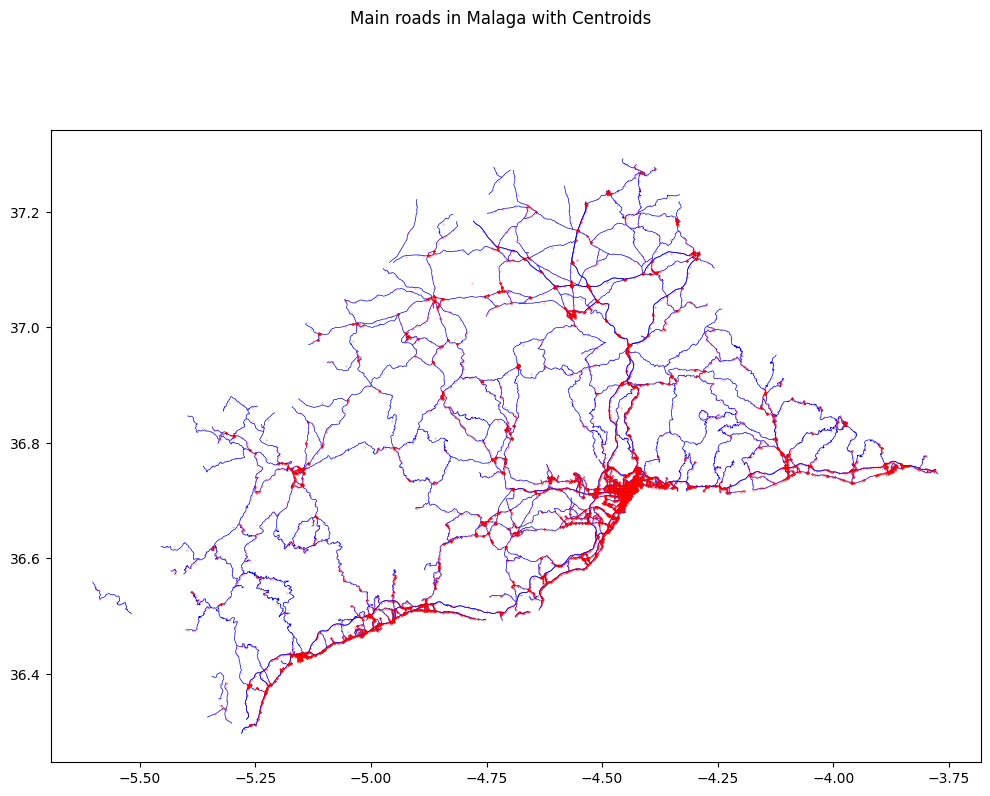

In [22]:
fig, ax = plt.subplots(figsize=(12, 9))

# Plot road network first with a specific color and zorder
df_Malaga.plot(ax=ax, linewidth=0.5, color='blue', zorder=1)

# Plot centroids (assumed to be in df['Centroid']) on top with a smaller size, color, and transparency
df_Malaga['Centroid'].plot(ax=ax, marker='o', color='red', markersize=0.05, alpha=0.7, zorder=2)

# Add title
fig.suptitle('Main roads in Malaga with Centroids')
plt.show()


In [23]:
df_Malaga

,osm_id,highway,name,maxspeed,lanes,surface,geometry,Centroid,Midpoint,sinuosity
32,4049733,motorway,Autovía de Estación de Salinas a Villanueva de...,120,2,asphalt,"LINESTRING (-4.29162 37.12792, -4.29164 37.127...",POINT (-4.29166 37.12704),POINT (-4.29166 37.12704),1.001917
37,4049778,motorway,Autopista del Mediterráneo,100,2,asphalt,"LINESTRING (-4.72473 36.50683, -4.72579 36.506...",POINT (-4.72775 36.50608),POINT (-4.72777 36.50614),1.004106
38,4049784,primary,None,50,3,asphalt,"LINESTRING (-4.47432 36.68569, -4.47421 36.685...",POINT (-4.47422 36.68561),POINT (-4.47422 36.68561),1.002508
41,4053813,secondary,Avenida de Málaga,None,None,asphalt,"LINESTRING (-5.14996 36.75322, -5.15 36.75312,...",POINT (-5.15054 36.75239),POINT (-5.15054 36.75239),1.004336
42,4053815,secondary,None,None,2,asphalt,"LINESTRING (-5.055 36.86399, -5.05502 36.86399...",POINT (-5.0593 36.85678),POINT (-5.06218 36.8567),1.472875
...,...,...,...,...,...,...,...,...,...,...
649152,1374826925,tertiary,None,None,None,asphalt,"LINESTRING (-5.14703 36.43452, -5.14705 36.434...",POINT (-5.14707 36.43441),POINT (-5.14711 36.4344),1.621098
649163,1374862743,tertiary,None,None,None,asphalt,"LINESTRING (-4.32045 36.8011, -4.32033 36.8012...",POINT (-4.29988 36.7996),POINT (-4.29857 36.79801),1.216178
649593,1376439405,motorway_link,None,120,1,asphalt,"LINESTRING (-4.94788 36.52598, -4.94846 36.526...",POINT (-4.94948 36.52622),POINT (-4.94948 36.52625),1.002444
650068,1377214189,tertiary,None,None,None,None,"LINESTRING (-4.68518 36.93043, -4.68506 36.930...",POINT (-4.68511 36.93052),POINT (-4.6851 36.93052),1.183782


In [24]:
CLC_Spain = '/content/CLC_Spain.tif'
CLC_Spain_raster = rxr.open_rasterio(CLC_Spain)  # Open the raster file with rioxarray

# Get the CRS from the opened raster
raster_crs = CLC_Spain_raster.rio.crs

# Ensure roads are in a projected CRS for accurate buffering (meters)
roads = df_Malaga.to_crs(raster_crs)  # Use the raster's CRS for reprojection

# Run zonal stats
stats = zonal_stats(roads['geometry'], CLC_Spain, stats=['majority'], categorical=True)

# Add majority land cover type to roads GeoDataFrame
roads['clc_majority'] = [s['majority'] for s in stats]

In [26]:
Slope_Spain = '/content/DEM_Malaga.tif'
Slope_Spain_raster = rxr.open_rasterio(Slope_Spain)  # Open the raster file with rioxarray

# Get the CRS from the opened raster
raster_crs = Slope_Spain_raster.rio.crs

# Ensure roads are in a projected CRS for accurate buffering (meters)
roads = df_Malaga.to_crs(raster_crs)  # Use the raster's CRS for reprojection

# Run zonal stats
stats = zonal_stats(roads['geometry'], Slope_Spain, stats=['mean'], categorical=True)

# Add majority land cover type to roads GeoDataFrame
roads['Average_Slope'] = [s['mean'] for s in stats]

In [27]:
roads
# Buffer the lines to create polygons (e.g., 5 meters wide)
# roads['geometry'] = roads.geometry.buffer(5)

,osm_id,highway,name,maxspeed,lanes,surface,geometry,Centroid,Midpoint,sinuosity,Average_Slope
32,4049733,motorway,Autovía de Estación de Salinas a Villanueva de...,120,2,asphalt,"LINESTRING (3048902.37 1680681.99, 3048896.823...",POINT (-4.29166 37.12704),POINT (-4.29166 37.12704),1.001917,1.564524
37,4049778,motorway,Autopista del Mediterráneo,100,2,asphalt,"LINESTRING (2999259.01 1620476.522, 2999162.43...",POINT (-4.72775 36.50608),POINT (-4.72777 36.50614),1.004106,9.695560
38,4049784,primary,None,50,3,asphalt,"LINESTRING (3024714.044 1635643.331, 3024721.9...",POINT (-4.47422 36.68561),POINT (-4.47422 36.68561),1.002508,1.189768
41,4053813,secondary,Avenida de Málaga,None,None,asphalt,"LINESTRING (2966366.782 1654666.854, 2966361.9...",POINT (-5.15054 36.75239),POINT (-5.15054 36.75239),1.004336,1.477047
42,4053815,secondary,None,None,2,asphalt,"LINESTRING (2976853.407 1665027.694, 2976850.9...",POINT (-5.0593 36.85678),POINT (-5.06218 36.8567),1.472875,8.556106
...,...,...,...,...,...,...,...,...,...,...,...
649152,1374826925,tertiary,None,None,None,asphalt,"LINESTRING (2960512.31 1620004.841, 2960510.12...",POINT (-5.14707 36.43441),POINT (-5.14711 36.4344),1.621098,6.119520
649163,1374862743,tertiary,None,None,None,asphalt,"LINESTRING (3040411.165 1645607.88, 3040423.98...",POINT (-4.29988 36.7996),POINT (-4.29857 36.79801),1.216178,23.425954
649593,1376439405,motorway_link,None,120,1,asphalt,"LINESTRING (2979872.124 1626430.197, 2979823.5...",POINT (-4.94948 36.52622),POINT (-4.94948 36.52625),1.002444,12.523923
650068,1377214189,tertiary,None,None,None,None,"LINESTRING (3010652.944 1665839.345, 3010666.1...",POINT (-4.68511 36.93052),POINT (-4.6851 36.93052),1.183782,6.783063


In [28]:
roads.to_csv('Slope.csv')

2.2. Barcelona

In [29]:
import requests
import os

# region identifier
region = "europe/spain/andalucia"

# URL and save path
url = "https://download.geofabrik.de/europe/spain/andalucia-latest.osm.pbf"
# Specify the directory where the file should be saved
save_path = "/root/osm/osm_bpf/"
#The filename will be automatically appended

# Download using the correct region identifier
path_and_dump = dl.get_region_geofabrik(region, save_path=save_path)
print(f'Saved as {path_and_dump}')

INFO:osm_flex.download:Download file: /root/osm/osm_bpf/andalucia-latest.osm.pbf


Saved as /root/osm/osm_bpf/andalucia-latest.osm.pbf


In [30]:
gdf_and_mainroad = ex.extract_cis(path_and_dump, 'main_road')

INFO:osm_flex.extract:query is finished, lets start the loop
extract points: 0it [00:03, ?it/s]
INFO:osm_flex.extract:query is finished, lets start the loop
extract multipolygons: 0it [00:22, ?it/s]
INFO:osm_flex.extract:query is finished, lets start the loop
extract lines: 100%|██████████| 115659/115659 [00:22<00:00, 5174.33it/s] 


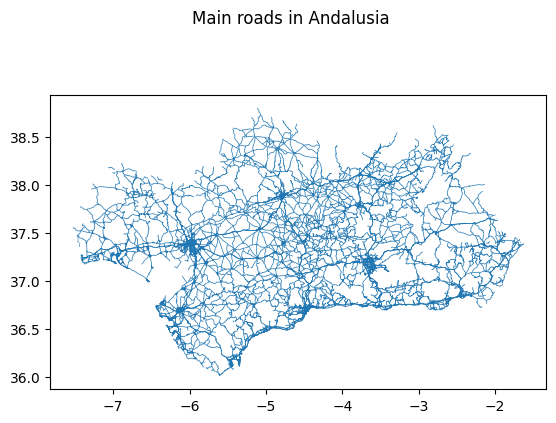

In [31]:
fig, ax = plt.subplots()
gdf_and_mainroad.plot(ax=ax, linewidth=0.5)
fig.suptitle('Main roads in Andalusia')
plt.show()

In [32]:
gdf_and_mainroad.head()
gdf_and_mainroad.to_csv('Andalusia_main_roads.csv')
Andalusia_Roadnetwork = pd.DataFrame(gdf_and_mainroad)

In [33]:
Andalusia_Roadnetwork.head()

,osm_id,highway,name,maxspeed,lanes,surface,geometry
0,4049715,motorway,Autovía de Sevilla a Almería por Granada,100,2,asphalt,"LINESTRING (-3.57281 37.23351, -3.57352 37.233..."
1,4049716,motorway,Autovía de Sevilla a Almería por Granada,120,2,asphalt,"LINESTRING (-3.37193 37.30829, -3.37243 37.308..."
2,4049718,motorway,Autovía de Sevilla a Almería por Granada,100,2,asphalt,"LINESTRING (-3.56781 37.23156, -3.56843 37.231..."
3,4049719,motorway_link,None,40,1,None,"LINESTRING (-3.56981 37.23242, -3.56968 37.232..."
4,4049722,motorway_link,None,None,None,None,"LINESTRING (-3.5706 37.23178, -3.57034 37.2316..."


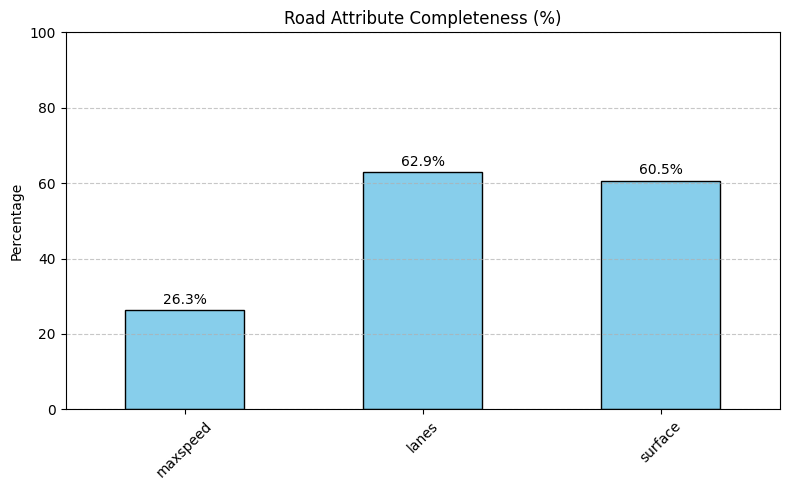

In [34]:
# Assign DataFrame for easier handling
df = Andalusia_Roadnetwork

# Columns of interest
columns = ['maxspeed', 'lanes', 'surface']

# Calculate completeness (non-null percentage)
completeness = df[columns].notnull().mean() * 100

# Plot
plt.figure(figsize=(8, 5))
completeness.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Road Attribute Completeness (%)')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values
for idx, val in enumerate (completeness):
    plt.text(idx, val + 1, f'{val:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [35]:
from shapely.geometry import LineString
import math

def calculate_sinuosity(coordinates):
    # Create a LineString object
    line = LineString(coordinates)

    # Calculate the actual road distance (length of the LineString)
    road_distance = line.length

    # Calculate the Euclidean distance (straight line distance between the first and last points)
    start_point = coordinates[0]
    end_point = coordinates[-1]
    euclidean_distance = math.sqrt((end_point[0] - start_point[0])**2 + (end_point[1] - start_point[1])**2)

    # Calculate the sinuosity
    sinuosity = road_distance / euclidean_distance

    return sinuosity

# Example usage with a list of coordinates
coordinates = [(-5.7814557, 43.4445928), (-5.7812748, 43.4447708), (-5.7811805, 43.4448446)]

# Calculate the sinuosity for the example coordinates
sinuosity = calculate_sinuosity(coordinates)

print(f"Sinuosity: {sinuosity}")

Sinuosity: 1.0013987205953914
